In [1]:
import sys
sys.path.insert(0, r'C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR\DataModule')
sys.path.insert(0, r'C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR')
import matplotlib.pyplot as plt
import Data_Preparation
import evaluate 
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
import xgboost as xgb
import scipy 

In [2]:
## importing data. 
path=r'C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR\Dataset'
df = Data_Preparation.CoronnaCERTAINDataset(
    library_root=path,
    challenge="regression", #option: regression, classification, two_stage
    dataset='CORRONA CERTAIN', 
    process_approach='SC', #option: KVB, SC
    imputation='KNN', #option: SimpleFill, KNN, SoftImpute, BiScaler, NuclearNormMinimization, IterativeImputer, IterativeSVD
    patient_group='bionaive TNF', #option: "all", "bioexp nTNF", "bionaive TNF", "bionaive orencia", "KVB"
    drug_group='all', #option: "all", "actemra", "cimzia", "enbrel", "humira", "orencia", "remicade", "rituxan", "simponi"
    time_points=(0,3), 
    train_test_rate=0.8,
    save_csv=False, 
    random_state=2022)

train, train_loc = df.get_train()
test, test_loc = df.get_test()


## train test split 
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]

y_test = test.iloc[:,-1]

## checking shape
print("x_train shape is ", X_train.shape)
print("y_train shape is ", y_train.shape)
print("x_test shape is ", X_test.shape)
print("y_test shape is ", y_test.shape)

X_train.columns

feature engineering, drop columns due to 70% missing value: Index(['smkyrs', 'numcigs', 'rfstatus_impute', 'ccpstatus_impute',
       'statin_use'],
      dtype='object')
Imputing row 1/1498 with 0 missing, elapsed time: 0.351
Imputing row 101/1498 with 1 missing, elapsed time: 0.352
Imputing row 201/1498 with 0 missing, elapsed time: 0.352
Imputing row 301/1498 with 0 missing, elapsed time: 0.353
Imputing row 401/1498 with 0 missing, elapsed time: 0.354
Imputing row 501/1498 with 1 missing, elapsed time: 0.354
Imputing row 601/1498 with 0 missing, elapsed time: 0.354
Imputing row 701/1498 with 0 missing, elapsed time: 0.355
Imputing row 801/1498 with 0 missing, elapsed time: 0.355
Imputing row 901/1498 with 0 missing, elapsed time: 0.356
Imputing row 1001/1498 with 1 missing, elapsed time: 0.356
Imputing row 1101/1498 with 0 missing, elapsed time: 0.357
Imputing row 1201/1498 with 0 missing, elapsed time: 0.357
Imputing row 1301/1498 with 0 missing, elapsed time: 0.358
Imputing row 14

Index(['grp', 'age', 'gender', 'final_education', 'race_grp', 'ethnicity',
       'weight', 'BMI', 'height', 'newsmoker', 'drinker', 'drinksperwk',
       'duration_ra', 'ara_func_class', 'num_tnf', 'num_nontnf', 'ndmardused',
       'rfstatus_b', 'usresultsRF', 'ccpstatus_b', 'usresultsCCP3', 'hxmi',
       'hxunstab_ang', 'hxchf', 'hxother_cv', 'hxtia', 'hxstroke', 'hxcopd',
       'hxhtn', 'hxdiabetes', 'hxhld', 'hx_anycancer', 'seatedbp1',
       'seatedbp2', 'pres_mtx', 'pres_arava', 'pres_azulfidine',
       'pres_plaquenil', 'pres_imuran', 'pres_minocin', 'pres_pred',
       'nonpresNSAIDs_use', 'NSAIDs_use', 'tender_jts_28', 'swollen_jts_28',
       'md_global_assess', 'pt_global_assess', 'di', 'pt_pain', 'usresultsCRP',
       'usresultsIgA', 'usresultsIgG', 'usresultsIgM', 'DAS28_CRP_0M'],
      dtype='object')

c:\Users\buzga\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DAS_28 Delta Distrobution')

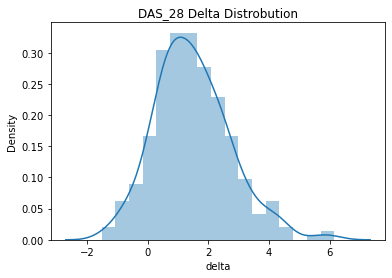

In [3]:

ax = sns.distplot(train["delta"])
ax.set_title("DAS_28 Delta Distrobution")
# train.columns

In [4]:
# ax=sns.scatterplot(train["DAS28_CRP_0M"],train['DAS28_CRP_3M'])

# ax.set_title("DAS_28 Baseline and DAS_28 3M")


In [5]:
# ax=sns.scatterplot(train["DAS28_CRP_0M"],train['DAS28_CRP_3M']-train["DAS28_CRP_0M"])
# ax.set_ylabel("DAS_28 Delta")
# ax.set_title("DAS_28 Baseline and DAS_28 delta")

KeyError: 'DAS28_CRP_3M'

In [6]:
## fitting models 
ols = linear_model.LinearRegression()
ols.fit(X_train,y_train)
ols_preds=ols.predict(X_test)


ridge_model = linear_model.RidgeCV()
ridge_model.fit(X_train,y_train)
ridge_preds=ridge_model.predict(X_test)


Random_forrest_model=ensemble.RandomForestRegressor(n_estimators=1000)
Random_forrest_model.fit(X_train,y_train)
Random_forrest_predictions=Random_forrest_model.predict(X_test)


xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
xgboost_preds = xgboost.predict(X_test)


Lasso_model = linear_model.Lasso()
Lasso_model.fit(X_train,y_train)
laso_preds=Lasso_model.predict(X_test)

Elastic_net_model = linear_model.ElasticNet()
Elastic_net_model.fit(X_train,y_train)
Elastic_net_preds=Elastic_net_model.predict(X_test)


svm_model=svm.SVR()
svm_model.fit(X_train,y_train)
svm_preds=svm_model.predict(X_test)

svm_poly_model=svm.SVR(kernel="poly")
svm_poly_model.fit(X_train,y_train)
svm_poly_preds=svm_poly_model.predict(X_test)

svm_sig_model=svm.SVR(kernel="sigmoid")
svm_sig_model.fit(X_train,y_train)
svm_sig_preds=svm_sig_model.predict(X_test)


estimators=[('lr',linear_model.RidgeCV()),('svr', svm.SVR()),("rf", ensemble.RandomForestRegressor())  ]
stracking_model = ensemble.StackingRegressor(estimators =estimators,final_estimator =linear_model.RidgeCV())    
stracking_model.fit(X_train,y_train)
stacking_model_preds=stracking_model.predict(X_test)

In [7]:
import inspect
print(inspect.getargspec(evaluate.AutoBuild))
aml = evaluate.AutoBuild(seed=1, project_name="EHR_RA_SC", challenge=df.challenge)

aml.evaluate("OLS Model", test,ols_preds)
aml.evaluate("Ridge Linear Model",test, ridge_preds)
aml.evaluate("Lasso Linear Model",test, laso_preds)
aml.evaluate("Elastic Nets",test, Elastic_net_preds)
aml.evaluate("SVM RBF",test,  svm_preds)
aml.evaluate("SVM POLY",test, svm_poly_preds)
aml.evaluate("SVM sigmoid", test, svm_sig_preds)
aml.evaluate("Random Forrest Regresion",  test,Random_forrest_predictions)
aml.evaluate("XGBoost Regression",  test,xgboost_preds)
aml.evaluate("Stacking Regression", test, stacking_model_preds)
regression, classification = aml.leaderboard()

ArgSpec(args=['self', 'seed', 'project_name', 'challenge'], varargs=None, keywords=None, defaults=(1, 'EHR_RA_SC', 'two_stage'))


C:\Users\buzga\AppData\Local\Temp/ipykernel_7836/2442581508.py:2: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  print(inspect.getargspec(evaluate.AutoBuild))


In [8]:
regression

,model,MAE,MSE,RMSE,R2,Pearson_Correlation
0,OLS Model,1.037648,1.643516,1.281997,-0.191730,0.262042
1,Ridge Linear Model,1.011165,1.588977,1.260546,-0.152184,0.242192
2,Lasso Linear Model,1.006680,1.553361,1.246339,-0.126359,0.080080
3,Elastic Nets,1.024552,1.620659,1.273051,-0.175157,0.068604
4,SVM RBF,0.946615,1.343810,1.159228,0.025589,0.170684
5,SVM POLY,0.977586,1.452830,1.205334,-0.053462,-0.034849
6,SVM sigmoid,1.726713,6.415396,2.532863,-3.651871,-0.000323
7,Random Forrest Regresion,0.985262,1.471463,1.213039,-0.066973,0.226208
8,XGBoost Regression,1.054843,1.663887,1.289918,-0.206502,0.204866
9,Stacking Regression,0.967162,1.398883,1.182744,-0.014344,0.243131


In [9]:
classification

,model,Accuracy,F1-Score
0,OLS Model,0.441860,0.428713
1,Ridge Linear Model,0.441860,0.416258
2,Lasso Linear Model,0.418605,0.323425
3,Elastic Nets,0.383721,0.297747
4,SVM RBF,0.488372,0.380460
5,SVM POLY,0.476744,0.368725
6,SVM sigmoid,0.488372,0.484382
7,Random Forrest Regresion,0.453488,0.362092
8,XGBoost Regression,0.406977,0.359790
9,Stacking Regression,0.465116,0.408734


In [1]:
aml.plot_results(mode="classification",metics="Accuracy")



NameError: name 'aml' is not defined

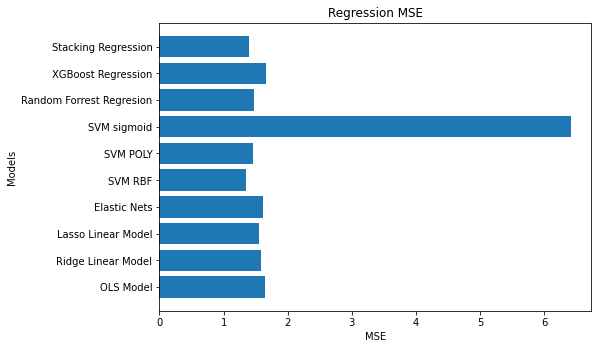

In [11]:
aml.plot_results(mode='regression',metics="MSE")